In [233]:
# Importar las bibliotecas

import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.regression.linear_model import OLS
import numpy as np

In [234]:
def load_excel_data(file_path: str) -> pd.DataFrame:
    """Load data from an Excel file.

    Args:
        file_path: Path to the Excel file.

    Returns:
        DataFrame containing the loaded data.
    """
    df = pd.read_excel(file_path)
    print(df)
    return df

In [235]:
file_path = r"E:\9_Desarrollo\UDD\Analisis_de_Datos\Data\Inputs_Ajuste\Q_Suavizado_Spline (Filtrado STL).xlsx"
df_input = load_excel_data(file_path)

           Pozo      Fecha  Caudal (L/s)  Outlier  Caudal_Filtrado  \
0      ARPES-01 2014-01-01      6.658555    False         6.658555   
1      ARPES-01 2014-02-01      7.717431    False         7.717431   
2      ARPES-01 2014-03-01      7.663063    False         7.663063   
3      ARPES-01 2014-04-01      7.573851    False         7.573851   
4      ARPES-01 2014-05-01      5.465879     True              NaN   
...         ...        ...           ...      ...              ...   
41221   XP17-05 2024-06-01      0.274481    False         0.274481   
41222   XP17-05 2024-08-01      0.070146     True              NaN   
41223   XP17-05 2024-09-01      0.100827     True              NaN   
41224   XP17-05 2024-10-01      0.841751     True              NaN   
41225   XP17-05 2024-12-01      0.211238    False         0.211238   

       Caudal_Filtrado_Suavizado  
0                       6.991488  
1                       7.218042  
2                       7.411679  
3                  

In [236]:
df = df_input[df_input["Pozo"] == "ARPES-03"]   # Seleccionar un pozo
print(df)

         Pozo      Fecha  Caudal (L/s)  Outlier  Caudal_Filtrado  \
132  ARPES-03 2014-01-01      1.072811    False         1.072811   
133  ARPES-03 2014-02-01      1.157087    False         1.157087   
134  ARPES-03 2014-03-01      0.847181    False         0.847181   
135  ARPES-03 2014-04-01      1.231922     True              NaN   
136  ARPES-03 2014-05-01      1.051452    False         1.051452   
..        ...        ...           ...      ...              ...   
252  ARPES-03 2024-01-01      0.139005    False         0.139005   
253  ARPES-03 2024-02-01      0.118002     True              NaN   
254  ARPES-03 2024-10-01      0.149471    False         0.149471   
255  ARPES-03 2024-11-01      0.121236    False         0.121236   
256  ARPES-03 2024-12-01      0.130573    False         0.130573   

     Caudal_Filtrado_Suavizado  
132                   0.972723  
133                   0.999527  
134                   1.026574  
135                        NaN  
136               

In [237]:
# Revisar los valores nulos en el DataFrame df
null_values = df.isnull().sum()
print(null_values)

Pozo                          0
Fecha                         0
Caudal (L/s)                  0
Outlier                       0
Caudal_Filtrado              24
Caudal_Filtrado_Suavizado    24
dtype: int64


In [238]:
df_valid = df[['Pozo', 'Fecha', 'Caudal (L/s)', 'Caudal_Filtrado','Caudal_Filtrado_Suavizado']].dropna(subset=['Caudal_Filtrado_Suavizado'])
print(df_valid)

         Pozo      Fecha  Caudal (L/s)  Caudal_Filtrado  \
132  ARPES-03 2014-01-01      1.072811         1.072811   
133  ARPES-03 2014-02-01      1.157087         1.157087   
134  ARPES-03 2014-03-01      0.847181         0.847181   
136  ARPES-03 2014-05-01      1.051452         1.051452   
137  ARPES-03 2014-06-01      0.933795         0.933795   
..        ...        ...           ...              ...   
251  ARPES-03 2023-12-01      0.162755         0.162755   
252  ARPES-03 2024-01-01      0.139005         0.139005   
254  ARPES-03 2024-10-01      0.149471         0.149471   
255  ARPES-03 2024-11-01      0.121236         0.121236   
256  ARPES-03 2024-12-01      0.130573         0.130573   

     Caudal_Filtrado_Suavizado  
132                   0.972723  
133                   0.999527  
134                   1.026574  
136                   1.080781  
137                   1.107633  
..                         ...  
251                   0.131466  
252                   0.128

In [239]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 132 to 256
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Pozo                       101 non-null    object        
 1   Fecha                      101 non-null    datetime64[ns]
 2   Caudal (L/s)               101 non-null    float64       
 3   Caudal_Filtrado            101 non-null    float64       
 4   Caudal_Filtrado_Suavizado  101 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 4.7+ KB


In [240]:
print(df_valid['Caudal_Filtrado_Suavizado'].describe())

count    101.000000
mean       0.835241
std        0.438957
min        0.128115
25%        0.393952
50%        0.999527
75%        1.229246
max        1.382276
Name: Caudal_Filtrado_Suavizado, dtype: float64


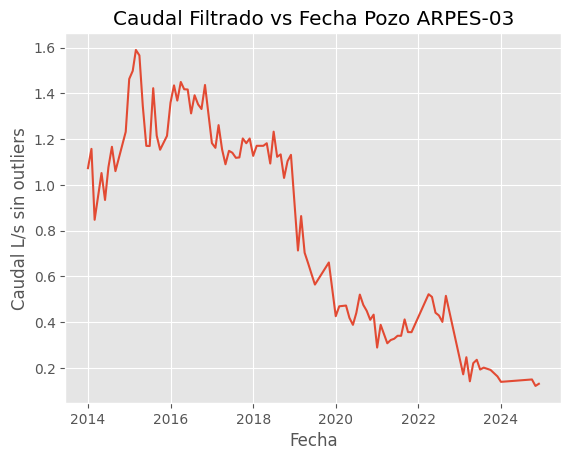

In [241]:
# Visualización 

import matplotlib.pyplot as plt
plt.plot(df_valid['Fecha'], df_valid['Caudal_Filtrado'])
plt.title('Caudal Filtrado vs Fecha Pozo ARPES-03')
plt.xlabel('Fecha')
plt.ylabel('Caudal L/s sin outliers')    
plt.show()

In [242]:
df_valid.head()

,Pozo,Fecha,Caudal (L/s),Caudal_Filtrado,Caudal_Filtrado_Suavizado
132,ARPES-03,2014-01-01,1.072811,1.072811,0.972723
133,ARPES-03,2014-02-01,1.157087,1.157087,0.999527
134,ARPES-03,2014-03-01,0.847181,0.847181,1.026574
136,ARPES-03,2014-05-01,1.051452,1.051452,1.080781
137,ARPES-03,2014-06-01,0.933795,0.933795,1.107633


### STL (Seasonal-Trend Decomposition using Loess) en Series Temporales

**STL** es una técnica de descomposición de series temporales que permite dividir una serie en tres componentes: **tendencia (Trend)**, **estacionalidad (Seasonal)** y **residuales (Resid)**. Este método es especialmente útil para identificar patrones subyacentes y fluctuaciones en datos que varían con el tiempo, como es el caso del flujo de caudal en pozos.

#### Componentes de STL:

1. **Tendencia (Trend)**: Representa la dirección general de los datos a lo largo del tiempo. Es el componente más lento en cuanto a cambios, mostrando el comportamiento de la serie a largo plazo.
2. **Estacionalidad (Seasonal)**: Captura patrones repetitivos que se presentan en intervalos regulares de tiempo (por ejemplo, anual o mensual). Esto es importante cuando el caudal podría estar influenciado por factores estacionales.
3. **Residuales (Resid)**: Representan el ruido o las fluctuaciones aleatorias en los datos, luego de haber eliminado la tendencia y la estacionalidad.

#### ¿Por qué aplicar STL en este análisis?

En el contexto de la detección de outliers en series temporales, STL permite descomponer la serie de caudales en sus componentes principales y, al aislar el componente **residual**, ayuda a identificar valores atípicos o inusuales que no corresponden con la tendencia ni la estacionalidad. Estos outliers pueden estar relacionados con eventos no esperados en la extracción de los pozos, cambios operativos o errores en las mediciones. La **suma de los componentes Resid y Seasonal** (llamada "Ruido" en este caso) facilita la visualización de estas anomalías al centrarse en las variaciones no explicadas por la tendencia general o patrones estacionales.

In [243]:
# Crear un nuevo DataFrame para guardar los resultados
df_result = pd.DataFrame()

#Parámetro para STL
PeriodoSTL = 12
Seasonal = 13  #Debe ser impar mayor a 3


# Iterar por cada pozo
for pozo in df_valid['Pozo'].unique():
    # Filtrar los datos por pozo
    df_temp = df_valid[df_valid['Pozo'] == pozo]

    if not df_temp.empty:
        # Aplicar STL y guardar los resultados en el DataFrame
        stl = STL(df_temp['Caudal (L/s)'], period= PeriodoSTL, seasonal=Seasonal) 
        result = stl.fit()

        # Guardar los componentes de la descomposición STL en el DataFrame
        df_temp['Trend'] = result.trend
        df_temp['Seasonal'] = result.seasonal
        df_temp['Resid'] = result.resid
        df_temp['Ruido'] = df_temp['Resid'] + df_temp['Seasonal']  # Agregar el campo 'Ruido'
  
        # Juntar los resultados de cada iteración
        df_result = pd.concat([df_result, df_temp])

# Mostrar los primeros registros del resultado
df_result.head()

,Pozo,Fecha,Caudal (L/s),Caudal_Filtrado,Caudal_Filtrado_Suavizado,Trend,Seasonal,Resid,Ruido
132,ARPES-03,2014-01-01,1.072811,1.072811,0.972723,0.991412,0.126013,-0.044614,0.081399
133,ARPES-03,2014-02-01,1.157087,1.157087,0.999527,1.024295,0.065015,0.067776,0.132792
134,ARPES-03,2014-03-01,0.847181,0.847181,1.026574,1.056814,-0.171669,-0.037965,-0.209634
136,ARPES-03,2014-05-01,1.051452,1.051452,1.080781,1.088843,-0.086265,0.048874,-0.037391
137,ARPES-03,2014-06-01,0.933795,0.933795,1.107633,1.120238,-0.031793,-0.154649,-0.186442


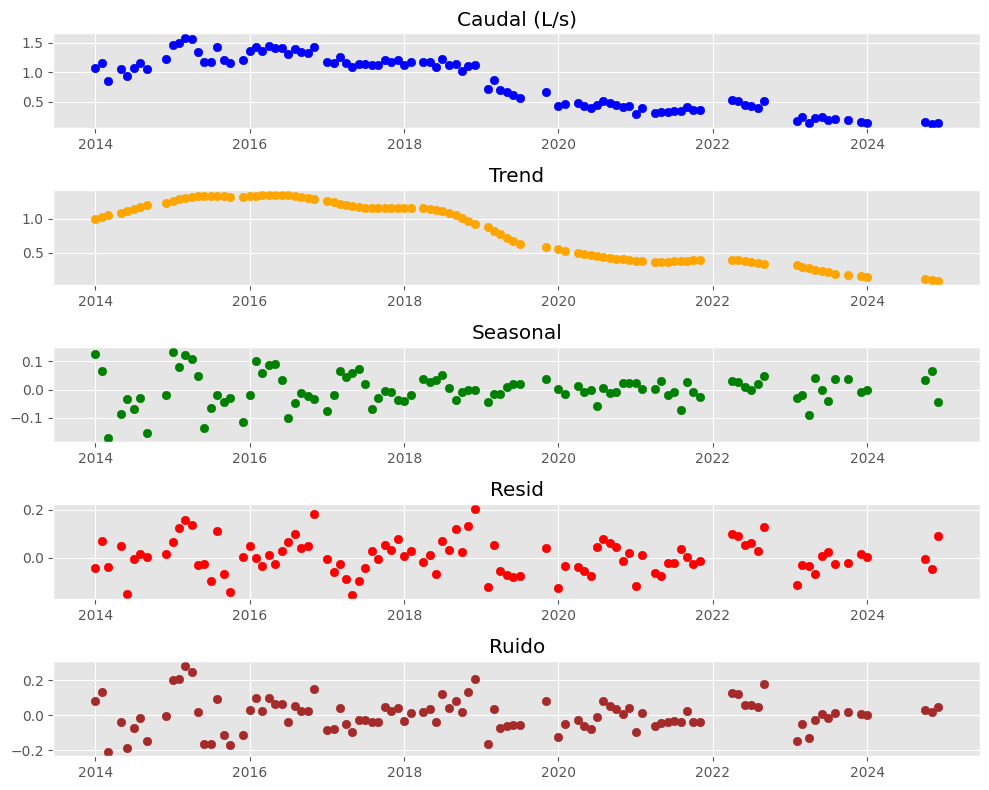

In [244]:
#Graficar descomposición STL

# Activa el estilo 'ggplot'
plt.style.use('ggplot')

#Seleccionar pozo
Pozo_selec='ARPES-03'
df_result_pozo = df_result[df_result['Pozo'] == Pozo_selec]

plt.figure(figsize=(10, 8))

#Graficar la serie original
plt.subplot(5, 1, 1)
plt.scatter(df_result_pozo['Fecha'], df_result_pozo['Caudal (L/s)'], label='Caudal', color='blue')   
plt.title('Caudal (L/s)')
plt.grid(True)

#Graficar la tendencia
plt.subplot(5, 1, 2)
plt.scatter(df_result_pozo['Fecha'], df_result_pozo['Trend'], label='Trend', color='orange')
plt.title('Trend')
plt.grid(True)

#Graficar la estacionalidad
plt.subplot(5, 1, 3)
plt.scatter(df_result_pozo['Fecha'], df_result_pozo['Seasonal'], label='Seasonal', color='green')
plt.title('Seasonal')
plt.grid(True)

# Graficar los residuos
plt.subplot(5, 1, 4)
plt.scatter(df_result_pozo['Fecha'], df_result_pozo['Resid'], label='Resid', color='red')
plt.title('Resid')
plt.grid(True)

# Graficar Q-T
plt.subplot(5, 1, 5)
plt.scatter(df_result_pozo['Fecha'], df_result_pozo['Ruido'], label='Ruido', color='brown')
plt.title('Ruido')
plt.grid(True)

#Ajustar el layout para evitar la superposición
plt.tight_layout()

#Mostrar la gráfica
plt.show()

###  Descomposición de la Serie Temporal para el Pozo ARPES-03

La descomposición de la serie temporal para el pozo ARPES-03, que se muestra en la gráfica, nos proporciona una visión detallada de los componentes que la conforman. Aquí hay una interpretación de cada componente:

1. **Caudal (L/s):**

   La serie original del caudal muestra una tendencia ligeramente decreciente a lo largo del tiempo, con algunas variaciones alrededor de la tendencia.

2. **Trend:**

   La línea de tendencia muestra una disminución suave en el caudal a lo largo del período de tiempo. Esta disminución no es abrupta, lo que sugiere que la tendencia es gradual y posiblemente influenciada por factores a largo plazo.

3. **Seasonal:**

   El componente estacional es bastante pequeño y no muestra un patrón claro. Esto sugiere que no hay una estacionalidad significativa en los datos del caudal para este pozo.

4. **Resid:**

   Los residuos, que representan la diferencia entre el caudal original y la suma del trend y la estacionalidad, muestran una variabilidad aleatoria alrededor de cero. Esto indica que, después de eliminar la tendencia y la estacionalidad, lo que queda es principalmente ruido aleatorio.

5. **Ruido:**

   El componente de ruido se muestra de forma independiente y también muestra una variabilidad aleatoria alrededor de cero. Es importante notar que este ruido no tiene una estructura clara ni un patrón discernible, lo que confirma que es aleatorio.

### Conclusión:

La descomposición de la serie temporal para el pozo ARPES-03 muestra que el caudal tiene una tendencia decreciente ligera, con un componente estacional insignificante y un componente de ruido aleatorio. Estos resultados sugieren que el comportamiento del caudal está principalmente influenciado por la tendencia decreciente y que la estacionalidad no juega un papel importante.


La transformación de variables para reducir la tendencia no sería necesaria para el pozo ARPES-03, basándonos en la descomposición de la serie temporal que hemos analizado.
El gráfico de la serie temporal muestra una ligera tendencia decreciente, pero no es abrupta ni pronunciada. El componente de tendencia capturado por la descomposición también es suave y gradual.
En este caso, aplicar una transformación de Box-Cox o la diferenciación podría ser excesivo y no aportar una mejora significativa al análisis.
La transformación de variables es más útil cuando hay una tendencia fuerte o una varianza no estacionaria en los datos. Como la tendencia en este caso es suave y los residuos parecen aleatorios, un modelo autorregresivo (AR) puede ser suficiente para capturar la dinámica de la serie.

In [230]:
# Transformación Box-Cox para estabilizar la varianza
# df_valid['Caudal_BoxCox'], lambda_boxcox = boxcox(df_valid['Caudal (L/s)'].values + 1) # Sumar 1 para evitar log(0)
# print(f"Lambda de Box-Cox: {lambda_boxcox}")

# Diferenciación para remover tendencia
# df_valid['Caudal_Diff'] = df_valid['Caudal_BoxCox'].diff().dropna()

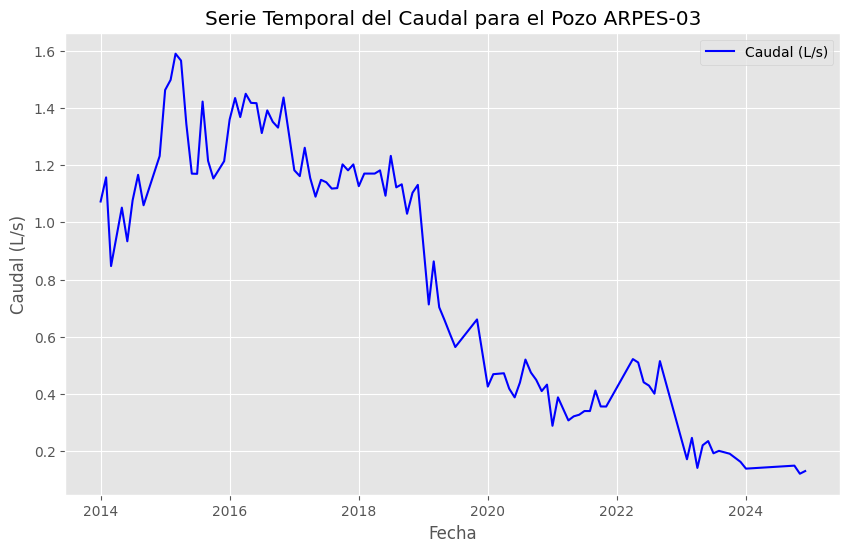

Estadístico ADF: -0.2070579995470034
Valor p: 0.937675076832977

Modelo AR(1):
R² Ajustado: 0.9373
Error Estándar de Predicción (EP): 0.1120
                            OLS Regression Results                            
Dep. Variable:           Caudal (L/s)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1481.
Date:              dom., 27 oct. 2024   Prob (F-statistic):           5.82e-61
Time:                        13:10:13   Log-Likelihood:                 77.068
No. Observations:                 100   AIC:                            -150.1
Df Residuals:                      98   BIC:                            -144.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Asegurar de que la columna 'Fecha' esté en el formato correcto
df_valid['Fecha'] = pd.to_datetime(df_valid['Fecha'])
df_valid.set_index('Fecha', inplace=True)

# Filtrar datos del pozo ARPES-03
data = df_valid[df_valid['Pozo'] == 'ARPES-03']


# Activa el estilo 'ggplot'
plt.style.use('ggplot')

# Visualizar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(data['Caudal (L/s)'], label='Caudal (L/s)', color='blue')
plt.title('Serie Temporal del Caudal para el Pozo ARPES-03')
plt.xlabel('Fecha')
plt.ylabel('Caudal (L/s)')
plt.legend()
plt.grid(True)  # Agregar la grilla
plt.show()

# Verificar la estacionariedad con la prueba de Dickey-Fuller
result = adfuller(data['Caudal (L/s)'])
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])

# Función para aplicar modelos AR(p) y evaluar
def evaluate_ar_model(p, data):
    # Crear las variables dependientes e independientes
    y = data['Caudal (L/s)'][p:]
    X = pd.concat([data['Caudal (L/s)'].shift(i) for i in range(1, p+1)], axis=1).dropna()
    X.columns = [f'Lag_{i}' for i in range(1, p+1)]
    
    # Alinear y X
    y = y[len(y) - len(X):]
    
    # Añadir constante
    X = sm.add_constant(X)

    # Ajustar el modelo
    model = sm.OLS(y, X).fit()
    
    # Calcular el error estándar de predicción
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    ep = np.sqrt(mse)
    
    # Retornar resultados
    return model.rsquared_adj, ep, model.summary()

# Evaluar modelos AR(1) a AR(4)
results = {}
for p in range(1, 5):
    r_squared_adj, ep, summary = evaluate_ar_model(p, data)
    results[p] = (r_squared_adj, ep, summary)

# Mostrar resultados
for p, (r_squared_adj, ep, summary) in results.items():
    print(f'\nModelo AR({p}):')
    print(f'R² Ajustado: {r_squared_adj:.4f}')
    print(f'Error Estándar de Predicción (EP): {ep:.4f}')
    print(summary)

# Discusión de resultados
print("\nDiscusión de Resultados:")
print("Los modelos de regresión lineal con componentes autorregresivos de orden 1 a 4 han sido evaluados. "
      "Los valores de R² ajustado y el error estándar de predicción (EP) se presentan para cada modelo. "
      "El objetivo es identificar el modelo que mejor se ajuste a los datos, considerando una buena "
      "capacidad predictiva y la simplicidad del modelo.")


### **Conclusión (Regresión Lineal Ordinaria OLS)**

La prueba de Dickey-Fuller realizada sobre la serie temporal del caudal del pozo ARPES-03 mostró un estadístico ADF de **-0.2071** con un valor p de **0.9377**. Estos resultados sugieren que no se puede rechazar la hipótesis nula de que la serie temporal tiene una raíz unitaria, indicando que la serie no es estacionaria. Esto sugiere que puede ser necesario aplicar transformaciones o diferenciar la serie para abordar la no estacionariedad antes de realizar un análisis más profundo.

En cuanto a los modelos autorregresivos (AR) evaluados mediante OLS:

- **Modelo AR(1)**:
  - R² ajustado: **0
  - Error estándar de predicción (EP): **0.1120**

- **Modelo AR(2)**:
  - R² ajustado: **0.9436**
  - EP: **0.1059**

Los resultados muestran un incremento en el R² ajustado a medida que se aumenta el orden del modelo, alcanzando un valor máximo de **0.9470** para el modelo AR(4). Esto indica que los modelos son efectivos para explicar la variabilidad en los datos de caudal.

### Discusión de resultados

Los modelos de regresión lineal con componentes autorregresivos de orden 1 a 4 han sido evaluados. Los valores de R² ajustado y el error estándar de predicción (EP) se presentan para cada modelo. El objetivo es identificar el modelo que mejor se ajuste a los datos, considerando una buena capacidad predictiva y la simplicidad del modelo.


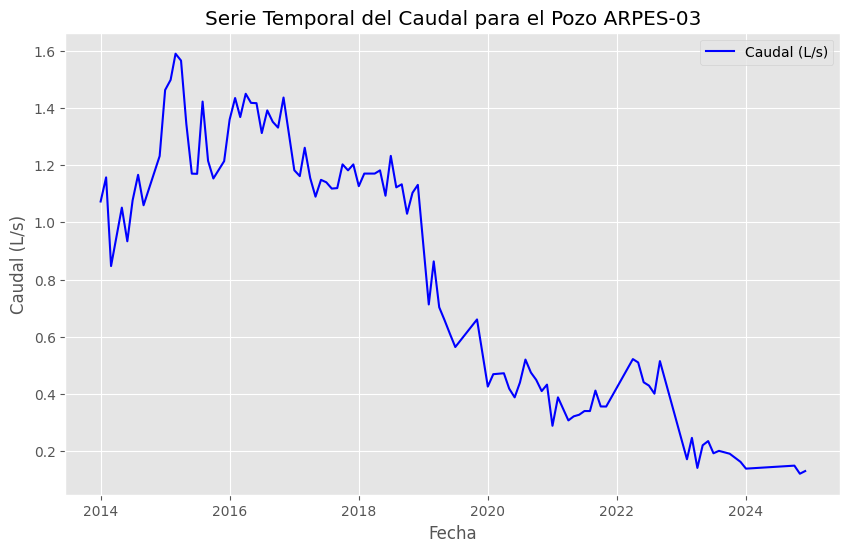

Estadístico ADF: -0.2070579995470034
Valor p: 0.937675076832977

Modelo AR(1):
R² Ajustado: 0.9373
Error Estándar de Predicción (EP): 0.1120

Modelo AR(2):
R² Ajustado: 0.9436
Error Estándar de Predicción (EP): 0.1059

Modelo AR(3):
R² Ajustado: 0.9469
Error Estándar de Predicción (EP): 0.1027

Modelo AR(4):
R² Ajustado: 0.9470
Error Estándar de Predicción (EP): 0.1025

Discusión de Resultados:
Los modelos de regresión lineal con componentes autorregresivos de orden 1 a 4 han sido evaluados. Los valores de R² ajustado y el error estándar de predicción (EP) se presentan para cada modelo. El objetivo es identificar el modelo que mejor se ajuste a los datos, considerando una buena capacidad predictiva y la simplicidad del modelo.


In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

# Asegurar de que la columna 'Fecha' esté en el formato correcto
df_valid['Fecha'] = pd.to_datetime(df_valid['Fecha'])
df_valid.set_index('Fecha', inplace=True)

# Filtrar datos del pozo ARPES-03
data = df_valid[df_valid['Pozo'] == 'ARPES-03']

# Visualizar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(data['Caudal (L/s)'], label='Caudal (L/s)', color='blue')
plt.title('Serie Temporal del Caudal para el Pozo ARPES-03')
plt.xlabel('Fecha')
plt.ylabel('Caudal (L/s)')
plt.legend()
plt.grid(True)  # Agregar la grilla
plt.show()

# Verificar la estacionariedad con la prueba de Dickey-Fuller
result = adfuller(data['Caudal (L/s)'])
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])

# Función para aplicar modelos AR(p) y evaluar
def evaluate_ar_model(p, data):
    # Crear las variables dependientes e independientes
    y = data['Caudal (L/s)'][p:].values
    X = pd.concat([data['Caudal (L/s)'].shift(i) for i in range(1, p + 1)], axis=1).dropna()
    
    # Alinear y X
    y = y[len(y) - len(X):]
    
    # Ajustar el modelo
    model = LinearRegression()
    model.fit(X, y)
    
    # Predecir
    y_pred = model.predict(X)
    
    # Calcular R² ajustado y error estándar de predicción
    r_squared_adj = 1 - (1 - model.score(X, y)) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    mse = mean_squared_error(y, y_pred)
    ep = np.sqrt(mse)
    
    return r_squared_adj, ep

# Evaluar modelos AR(1) a AR(4)
results = {}
for p in range(1, 5):
    r_squared_adj, ep = evaluate_ar_model(p, data)
    results[p] = (r_squared_adj, ep)

# Mostrar resultados
for p, (r_squared_adj, ep) in results.items():
    print(f'\nModelo AR({p}):')
    print(f'R² Ajustado: {r_squared_adj:.4f}')
    print(f'Error Estándar de Predicción (EP): {ep:.4f}')

# Discusión de resultados
print("\nDiscusión de Resultados:")
print("Los modelos de regresión lineal con componentes autorregresivos de orden 1 a 4 han sido evaluados. "
      "Los valores de R² ajustado y el error estándar de predicción (EP) se presentan para cada modelo. "
      "El objetivo es identificar el modelo que mejor se ajuste a los datos, considerando una buena "
      "capacidad predictiva y la simplicidad del modelo.")


### **Conclusión Regresión Lineal**

La **prueba de Dickey-Fuller** realizada sobre la serie temporal del caudal del pozo ARPES-03 mostró un estadístico ADF de **-0.2071** con un valor p de **0.9377**. Estos resultados sugieren que no se puede rechazar la hipótesis nula de que la serie temporal tiene una raíz unitaria, lo que indica que la serie no es estacionaria. Esto implica que puede ser necesario aplicar transformaciones o diferenciar la serie para abordar la no estacionariedad antes de realizar un análisis más profundo.

En cuanto a los **modelos autorregresivos** (AR) evaluados:

- **Modelo AR(1)**:
  - R² Ajustado: **0.9373**
  - EP: **0.1120**

- **Modelo AR(2)**:
  - R² Ajustado: **0.9436**
  - EP: **0.1059**

- **Modelo AR(3)**:
  - R² Ajustado: **0.9469**
  - EP: **0.1027**

- **Modelo AR(4)**:
  - R² Ajustado: **0.9470**
  - EP: **0.1025**

Los resultados muestran un incremento progresivo en el R² ajustado a medida que se aumenta el orden del modelo, alcanzando un valor máximo de **0.9470** para el modelo AR(4). Esto indica que el modelo AR(4) explica el **94.70%** de la variabilidad del caudal, lo que es un buen ajuste.

El **error estándar de predicción (EP)** también disminuye de **0.1120** para AR(1) a **0.1025** para AR(4), lo que sugiere que la precisión de las predicciones mejora con el aumento del orden del modelo.

### Discusión de Resultados

Los modelos de regresión lineal con componentes autorregresivos de orden 1 a 4 han demostrado una buena capacidad predictiva. Sin embargo, es importante considerar el balance entre la complejidad del modelo y su capacidad de ajuste. Aunque el modelo AR(4) presenta el mejor ajuste, es recomendable evaluar si la mejora en R² ajustado y la reducción en el EP justifican la complejidad adicional en comparación con el modelo AR(3), que tiene un ajuste muy cercano.

En resumen, aunque los modelos AR(3) y AR(4) muestran un buen desempeño, se sugiere realizar un análisis adicional, como la validación cruzada, para seleccionar el modelo que no solo ajuste bien los datos, sino que también sea robusto y generalizable a nuevos datos.


### Comparación de Modelos

Se evaluaron cuatro modelos autorregresivos (AR) utilizando **regresión lineal** para analizar el caudal del pozo ARPES-03. A continuación, se presentan los resultados clave para cada modelo:

| Modelo  | R² Ajustado | Error Estándar de Predicción (EP) | Observaciones                      |
|---------|-------------|------------------------------------|------------------------------------|
| AR(1)   | 0.9373      | 0.1120                             | Muestra un buen ajuste inicial.    |
| AR(2)   | 0.9436      | 0.1059                             | Mejora ligera respecto a AR(1).    |
| AR(3)   | 0.9469      | 0.1027                             | Aumento significativo en R².       |
| AR(4)   | 0.9470      | 0.1025                             | Mejora marginal, pero con mejor ajuste. |

#### Análisis Comparativo

- **R² Ajustado**: Se observa un aumento progresivo en el R² ajustado a medida que se incrementa el orden del modelo, indicando que cada modelo adicional mejora la capacidad explicativa en comparación con el anterior. El modelo AR(4) presenta el R² ajustado más alto, lo que sugiere que es el que mejor explica la variabilidad del caudal.

- **Error Estándar de Predicción (EP)**: El EP también disminuye con el aumento del orden del modelo, lo que indica que las predicciones se vuelven más precisas. El modelo AR(4) presenta el menor EP, lo que refuerza su elección como el mejor modelo.

#### Conclusión

La comparación de los modelos sugiere que, aunque el modelo AR(4) es el que mejor se ajusta a los datos en términos de R² ajustado y EP, es importante considerar la simplicidad del modelo. La selección del modelo final debe equilibrar la capacidad predictiva con la complejidad, considerando que un modelo más complejo no siempre se traduce en una mejora significativa en las predicciones.

